In [1]:
import pandas as pd
import matplotlib as plt
from google.colab import files
uploaded = files.upload()

Saving datadata.csv to datadata.csv


TOP 5 BRAND  DECEMBER 2019
brand
BRAND_S    2197
BRAND_P    2194
BRAND_R    1508
BRAND_C    1365
BRAND_A    1315
Name: quantity, dtype: int64


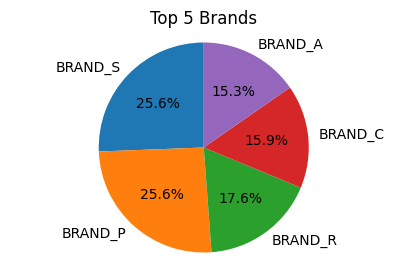

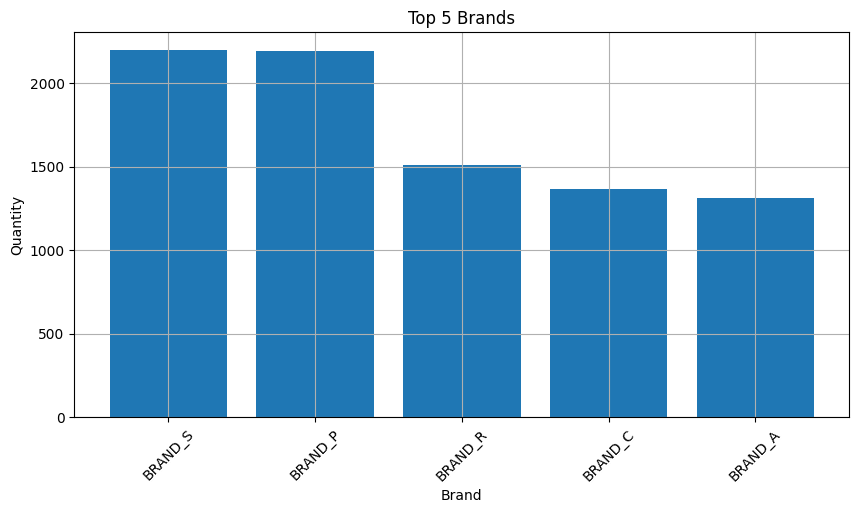

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('datadata.csv')
data['order_date'] = pd.to_datetime(data['order_date'])
dataset_dec = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]
brand_quantity = dataset_dec.groupby('brand')['quantity'].sum()
top5_brands = brand_quantity.nlargest(5)
print("TOP 5 BRAND  DECEMBER 2019")
print(top5_brands)
plt.figure(figsize=(5, 3))
plt.pie(top5_brands, labels=top5_brands.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Brands')
plt.axis('equal')
plt.figure(figsize=(10, 5))
plt.bar(top5_brands.index, top5_brands)
plt.title('Top 5 Brands')
plt.xlabel('Brand')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

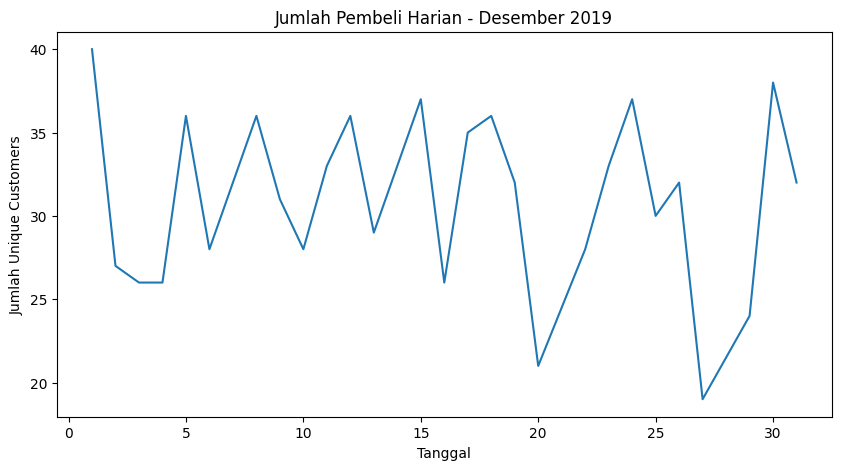

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('datadata.csv')
data['order_date'] = pd.to_datetime(data['order_date'])
dataset_dec = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]
daily_customers = dataset_dec.groupby(dataset_dec['order_date'].dt.day)['customer_id'].nunique()
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers)
plt.title('Jumlah Pembeli Harian - Desember 2019')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Unique Customers')
plt.show()

In [8]:
import pandas as pd

data = pd.read_csv('datadata.csv')
data['order_date'] = pd.to_datetime(data['order_date'])
dataset_dec = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]
brand_quantity = dataset_dec.groupby('brand')['quantity'].sum()
top5_brands = brand_quantity.nlargest(5)
print("TOP 5 BRAND  DECEMBER 2019")
print(top5_brands)

TOP 5 BRAND  DECEMBER 2019
brand
BRAND_S    2197
BRAND_P    2194
BRAND_R    1508
BRAND_C    1365
BRAND_A    1315
Name: quantity, dtype: int64


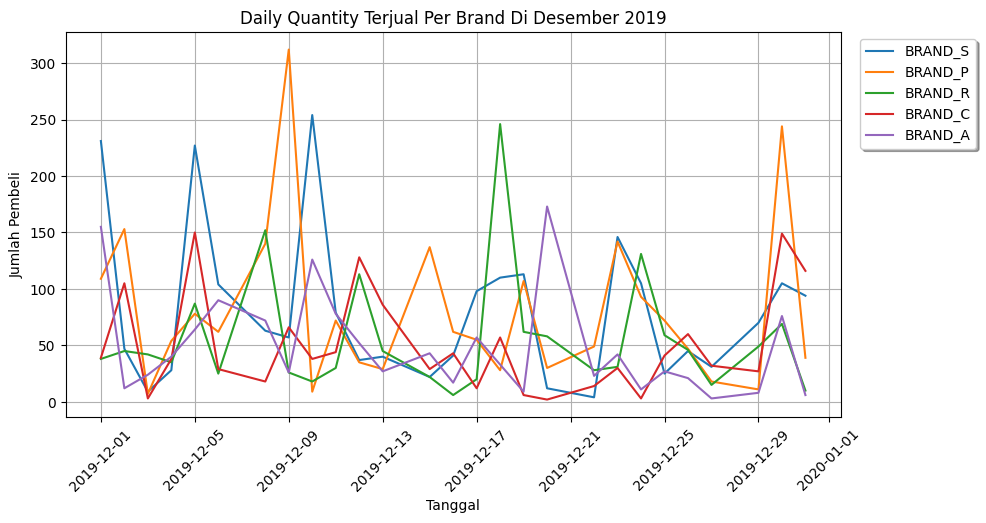

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('datadata.csv')
data['order_date'] = pd.to_datetime(data['order_date'])
dataset_dec = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]
daily_quantity = dataset_dec.pivot_table(index='order_date', columns='brand', values='quantity', aggfunc='sum')
top_5_brands = dataset_dec.groupby('brand')['quantity'].sum().nlargest(5).index
plt.figure(figsize=(10, 5))
for brand in top_5_brands:
    plt.plot(daily_quantity.index, daily_quantity[brand], label=brand)

lonjakan_tanggal = daily_quantity.sum(axis=1).idxmax()
lonjakan_quantity = daily_quantity.sum(axis=1).max()
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300), weight='bold', color='pink', arrowprops=dict(arrowstyle='->', connectionstyle="arc3", color='white'))
plt.title('Daily Quantity Terjual Per Brand Di Desember 2019')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pembeli')
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

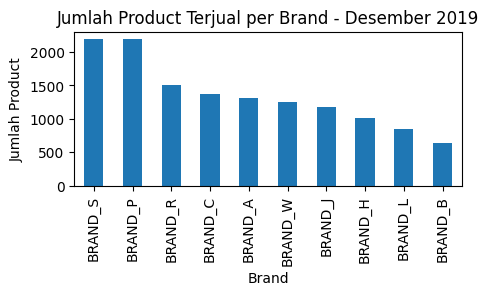

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('datadata.csv')
data['order_date'] = pd.to_datetime(data['order_date'])
dataset_dec = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]
product_count = dataset_dec.groupby('brand')['quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(5, 2))
product_count.plot(kind='bar')
plt.title('Jumlah Product Terjual per Brand - Desember 2019')
plt.xlabel('Brand')
plt.ylabel('Jumlah Product')
plt.show()

<Figure size 1000x500 with 0 Axes>

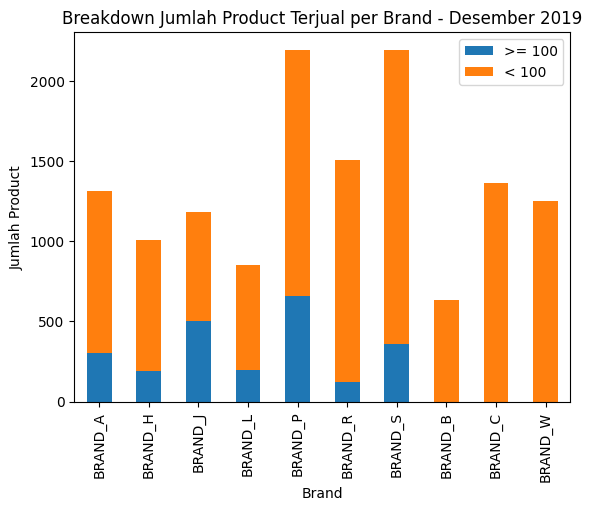

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('datadata.csv')
data['order_date'] = pd.to_datetime(data['order_date'])
dataset_dec = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]
above_100 = dataset_dec[dataset_dec['quantity'] >= 100]
below_100 = dataset_dec[dataset_dec['quantity'] < 100]
above_100_count = above_100.groupby('brand')['quantity'].sum()
below_100_count = below_100.groupby('brand')['quantity'].sum()
combined_data = pd.concat([above_100_count, below_100_count], axis=1, keys=['>= 100', '< 100'])
plt.figure(figsize=(10, 5))
combined_data.plot(kind='bar', stacked=True)
plt.title('Breakdown Jumlah Product Terjual per Brand - Desember 2019')
plt.xlabel('Brand')
plt.ylabel('Jumlah Product')
plt.show()

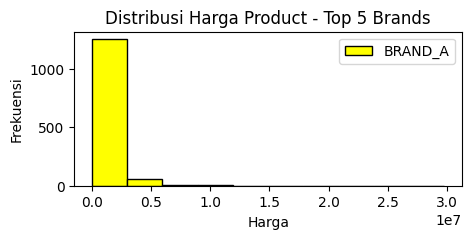

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('datadata.csv')
top5_brands = ['BRAND_A', 'BRAND_B', 'BRAND_C', 'BRAND_H', 'BRAND_J', 'BRAND_L', 'BRAND_P', 'BRAND_R', 'BRAND_S', 'BRAND_W']
top5_data = data[data['brand'].isin(top5_brands)]
median_prices = top5_data.groupby('product_id')['item_price'].median()
num_products = top5_data.groupby('brand').size()
plt.figure(figsize=(5, 2))
plt.hist(median_prices, bins=10, color='yellow', edgecolor='black')
plt.title('Distribusi Harga Product - Top 5 Brands')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.legend(num_products.index)
plt.show()

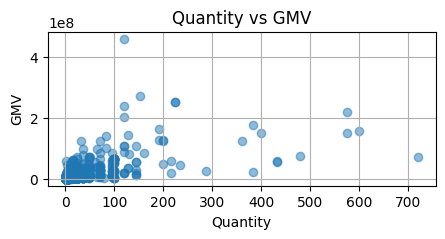

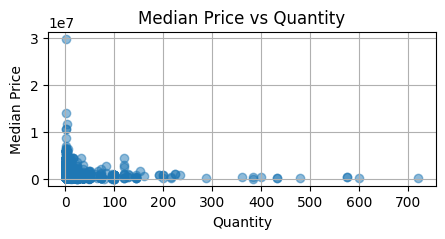

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('datadata.csv')
data['GMV'] = data['quantity'] * data['item_price']
plt.figure(figsize=(5, 2))
plt.scatter(data['quantity'], data['GMV'], alpha=0.5)
plt.title('Quantity vs GMV')
plt.xlabel('Quantity')
plt.ylabel('GMV')
plt.grid(True)
plt.show()
median_price = data.groupby('product_id')['item_price'].median()
plt.figure(figsize=(5, 2))
plt.scatter(data['quantity'], median_price[data['product_id']], alpha=0.5)
plt.title('Median Price vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Median Price')
plt.grid(True)
plt.show()

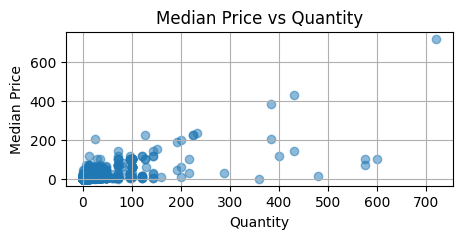

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('datadata.csv')
median_price = data.groupby('item_price')['quantity'].median()
plt.figure(figsize=(5, 2))
plt.scatter(data['quantity'], median_price[data['item_price']], alpha=0.5)
plt.title('Median Price vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Median Price')
plt.grid(True)
plt.show()
